
# **Stunting Toddler (Balita) Detection (121K rows)**
Link dataset yang digunakan : https://www.kaggle.com/datasets/rendiputra/stunting-balita-detection-121k-rows/data

## **1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## **2. Import Dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rendiputra/stunting-balita-detection-121k-rows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/stunting-balita-detection-121k-rows


In [ ]:
df = pd.read_csv('/kaggle/input/stunting-balita-detection-121k-rows/data_balita.csv')
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


## **3. Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(120999, 4)

In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [ ]:
df["Status Gizi"].value_counts()

,count
Status Gizi,
normal,67755
severely stunted,19869
tinggi,19560
stunted,13815


In [ ]:
df['Jenis Kelamin'].value_counts()

,count
Jenis Kelamin,
perempuan,61002
laki-laki,59997


<Axes: xlabel='Umur (bulan)', ylabel='Count'>

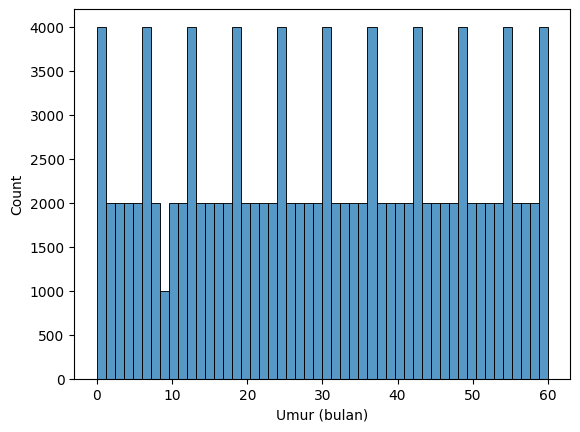

In [ ]:
sns.histplot(df['Umur (bulan)'])

Histogram (grafik batang) untuk melihat sebaran usia balita dalam dataset.
Ini membantu untuk  melihat:

-Umur berapa yang paling sering muncul?

-Apakah data usia menyebar rata, atau terkonsentrasi pada umur tertentu?



In [ ]:
for var in df.columns:

    print(df[var].value_counts())

Umur (bulan)
1     2000
3     2000
2     2000
4     2000
5     2000
      ... 
56    2000
59    2000
60    2000
0     1999
9     1000
Name: count, Length: 61, dtype: int64
Jenis Kelamin
perempuan    61002
laki-laki    59997
Name: count, dtype: int64
Tinggi Badan (cm)
89.700000    317
90.000000    315
88.000000    310
92.200000    309
92.900000    309
            ... 
61.448325      1
56.486972      1
47.855376      1
59.420472      1
65.613302      1
Name: count, Length: 6800, dtype: int64
Status Gizi
normal              67755
severely stunted    19869
tinggi              19560
stunted             13815
Name: count, dtype: int64


In [ ]:
df.dtypes

,0
Umur (bulan),int64
Jenis Kelamin,object
Tinggi Badan (cm),float64
Status Gizi,object


**Convert Data Type of Status Gizi to Integer**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Status Gizi']= le.fit_transform(df['Status Gizi'])

Label Encoder digunakan untuk mengubah kolom kategori Status Gizi menjadi angka.

In [ ]:
df['Status Gizi']

,Status Gizi
0,2
1,3
2,0
3,0
4,1
...,...
120994,0
120995,2
120996,0
120997,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Jenis Kelamin'] = le.fit_transform(df['Jenis Kelamin'])

corr = df['Status Gizi'].corr(df['Jenis Kelamin'])
print(f"Correlation: {corr:.2f}")

Correlation: 0.01


Setelah diubah, dicari korelasi antara Jenis Kelamin dan Status Gizi (Stunting) menggunakan .corr().

Hasil korelasi bisa bernilai:

0 → tidak berkorelasi

mendekati 1 → berkorelasi positif

mendekati -1 → berkorelasi negatif

Misalnya hasil Correlation: 0.12, artinya ada korelasi lemah bahwa laki-laki sedikit lebih berisiko stunting dibanding perempuan.

In [ ]:
df.dtypes

,0
Umur (bulan),int64
Jenis Kelamin,int64
Tinggi Badan (cm),float64
Status Gizi,int64


In [ ]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,2
1,0,0,56.705203,3
2,0,0,46.863358,0
3,0,0,47.508026,0
4,0,0,42.743494,1


In [ ]:
df['Status Gizi'].unique()

array([2, 3, 0, 1])

digunakan untuk menampilkan semua nilai unik (berbeda) yang ada di kolom Status Gizi

## **4. Cleansing Data**

In [ ]:
df.isnull().sum()

,0
Umur (bulan),0
Jenis Kelamin,0
Tinggi Badan (cm),0
Status Gizi,0


checking for null data (data that have no value)

In [ ]:
df.duplicated().sum()

np.int64(81574)

checking for duplicated data

In [ ]:
df = df.drop_duplicates()

for deleting duplicated data

In [ ]:
df.duplicated().sum()

np.int64(0)

rechecking for duplicated data

## **5. Data Visualization**

/tmp/ipython-input-39-418552888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Status Gizi', data=df, palette='flare')


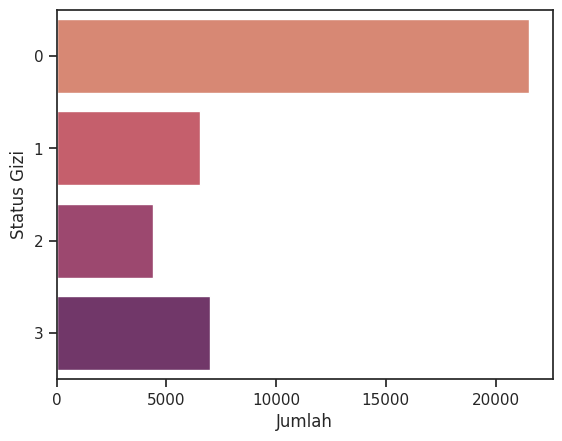

In [ ]:
sns.set_theme(style='ticks')
sns.countplot(y='Status Gizi', data=df, palette='flare')
plt.ylabel('Status Gizi')
plt.xlabel('Jumlah')
plt.show()

showing the 'Status Gizi' data as a graph

/tmp/ipython-input-40-2870730688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jenis Kelamin', data=df, palette='rocket')


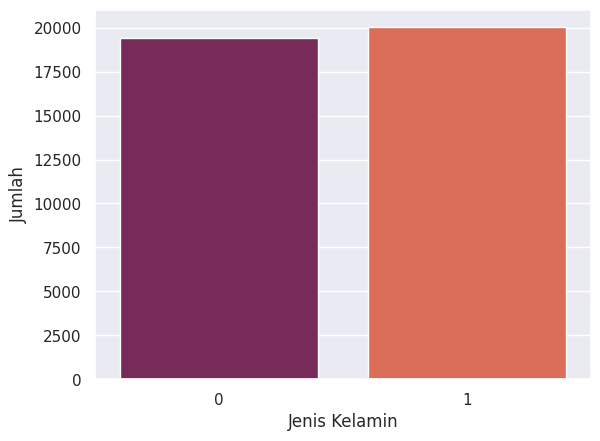

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Jenis Kelamin', data=df, palette='rocket')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kelamin')
plt.show()

showing the 'Jenis Kelamin' data as a graph

In [ ]:
x = df.drop(columns = ['Status Gizi'])
y = df['Status Gizi']

print('X : ',x.shape)
print('Y : ',y.shape)

X :  (39425, 3)
Y :  (39425,)


In [ ]:
# memisahkan fitur dan target
X = df.drop(['Status Gizi'], axis=1)
y = df['Status Gizi']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31540, 3)
y_train shape: (31540,)
X_test shape: (7885, 3)
y_test shape: (7885,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Menentukan K Terbaik
K = 18
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Untuk menentukan nilai K yang paling optimal (jumlah tetangga terdekat) dalam algoritma KNN, berdasarkan akurasi tertinggi.

Text(0.5, 1.0, 'accuracy vs K')

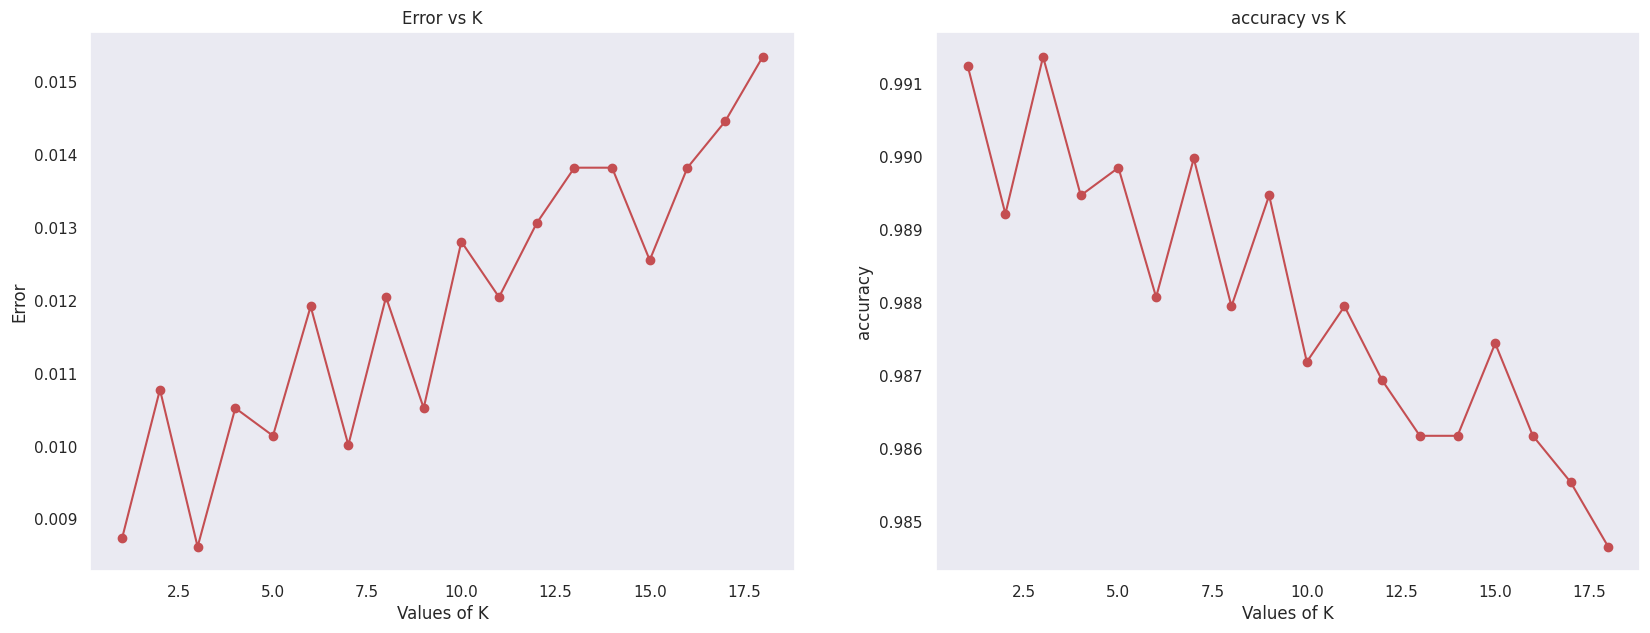

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,19),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,19),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

Untuk melihat hubungan antara nilai K dan akurasi/error model KNN agar kamu bisa memilih K terbaik.



In [ ]:
K=19
clf= KNeighborsClassifier(K)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print("Accuracy :%.3f"%metrics.accuracy_score(y_test,y_pred))

Accuracy :0.984


## **Calculate Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
y_pred = best_knn.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9913760304375396


In [ ]:
print('Training set score: {:.4f}'.format(best_knn.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(best_knn.score(X_test,y_test)))

Training set score: 1.0000
Test set score: 0.9914


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4339
           1       0.99      0.99      0.99      1330
           2       0.98      0.97      0.97       838
           3       0.99      0.99      0.99      1378

    accuracy                           0.99      7885
   macro avg       0.99      0.99      0.99      7885
weighted avg       0.99      0.99      0.99      7885



## **Confusion Matrix**

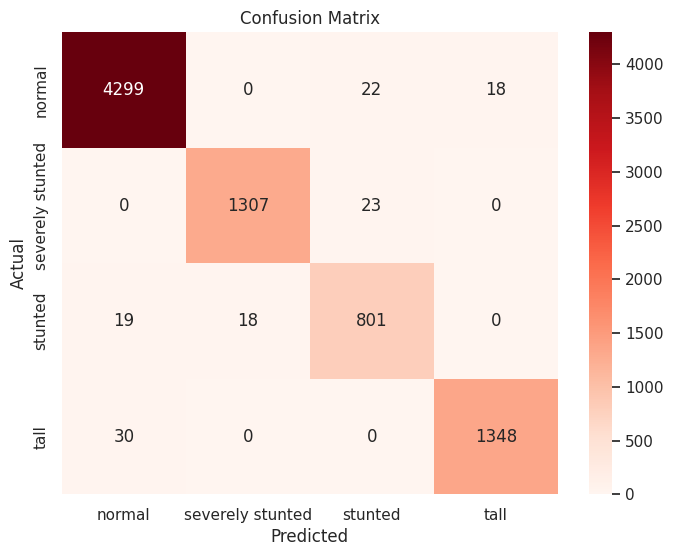

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['normal', 'severely stunted', 'stunted', 'tall']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test.values.reshape(-1, 1), y_pred))
print('Cross val: ', cross_val_score(knn, y_test.values.reshape(-1, 1), y_pred, cv = 5))
print('Accuracy :%.3f'%np.mean(cross_val_score(knn, y_test.values.reshape(-1, 1), y_pred)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4339
           1       0.99      0.98      0.98      1330
           2       0.95      0.96      0.95       838
           3       0.99      0.98      0.98      1378

    accuracy                           0.98      7885
   macro avg       0.98      0.98      0.98      7885
weighted avg       0.98      0.98      0.98      7885

Cross val:  [0.98604946 0.98541535 0.98161065 0.98478123 0.97970831]
Accuracy :0.984


In [ ]:
con = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n', con)

print('\nTrue Positives(TP) = ', con[0,0])

print('\nTrue Negatives(TN) = ', con[1,1])

print('\nFalse Positives(FP) = ', con[0,1])

print('\nFalse Negatives(FN) = ', con[1,0])

Confusion matrix

 [[4316    0   10   13]
 [   0 1320   10    0]
 [  10   15  813    0]
 [  10    0    0 1368]]

True Positives(TP) =  4316

True Negatives(TN) =  1320

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)

con = confusion_matrix(y_test,y_pred)
con

array([[4316,    0,   10,   13],
       [   0, 1320,   10,    0],
       [  10,   15,  813,    0],
       [  10,    0,    0, 1368]])

In [ ]:
print(y_pred)
print(y_test)

[0 2 1 ... 3 1 2]
96283    0
3843     2
81352    1
53213    0
95302    2
        ..
913      0
2087     0
57045    3
99394    1
94401    2
Name: Status Gizi, Length: 7885, dtype: int64


Initialize K-Fold Cross Validation attributes

In [ ]:
#Initialize the dictionary
results = {"uniform": {"k=4": {"accuracy": {}, "f1_score": {}},
                       "k=5": {"accuracy": {}, "f1_score": {}}},
           "distance": {"k=4": {"accuracy": {}, "f1_score": {}},
                        "k=5": {"accuracy": {}, "f1_score": {}}}}

#Loop for the KNN
for n_neighbors in range (3,16,2):
    #Loop for the K_Fold
    for k in [4,5]:
        #Declare the KFold for the validation
        kfold = KFold(n_splits=k, shuffle=True, random_state=42)

        #Uniform based KNN
        knn1 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
        scoresAcc = cross_val_score(knn1,x,y, cv = kfold,scoring='accuracy')
        scoresF1 = cross_val_score(knn1,x,y, cv = kfold,scoring='f1_weighted')
        results["uniform"][f"k={k}"]["accuracy"][n_neighbors] = np.mean(scoresAcc)
        results["uniform"][f"k={k}"]["f1_score"][n_neighbors] = np.mean(scoresF1)

        #Distance based KNN
        knn2 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
        scoresAcc = cross_val_score(knn2,x,y, cv = kfold,scoring='accuracy')
        scoresF1 = cross_val_score(knn2,x,y, cv = kfold,scoring='f1_weighted')
        results["distance"][f"k={k}"]["accuracy"][n_neighbors] = np.mean(scoresAcc)
        results["distance"][f"k={k}"]["f1_score"][n_neighbors] = np.mean(scoresF1)

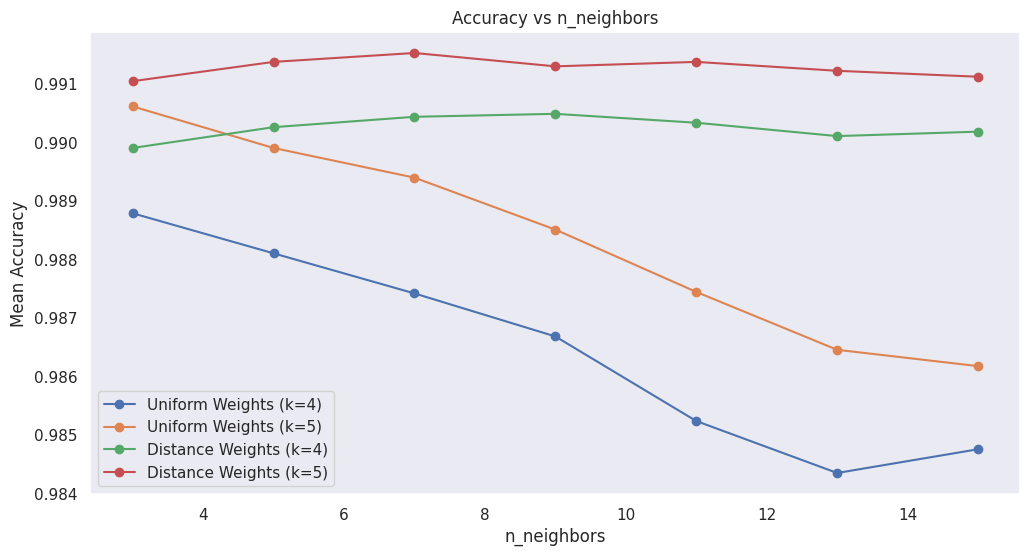

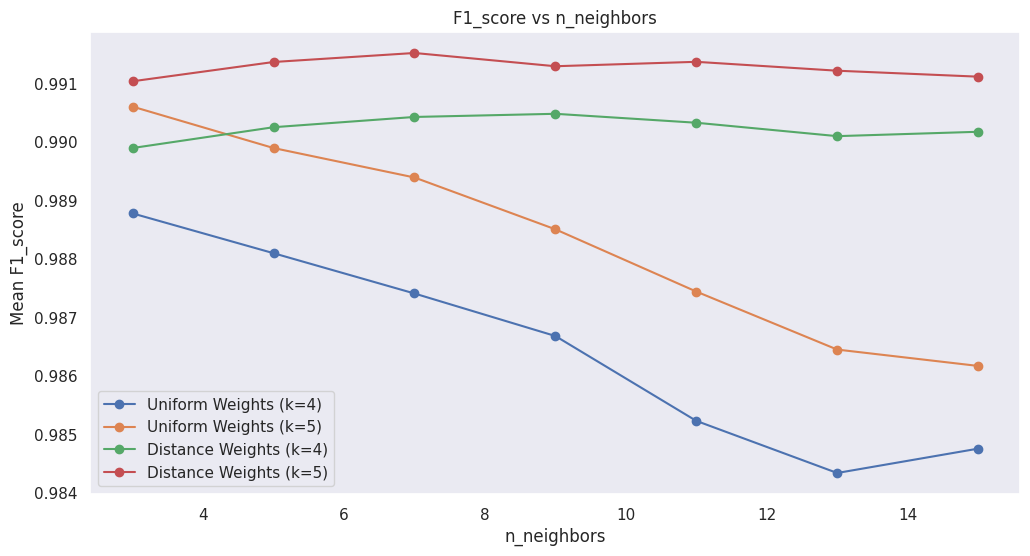

In [ ]:
#Define the function
def plot_results(results, metric):
    #Create the figure
    plt.figure(figsize=(12, 6))
    #iterate from weight and result
    for weight, folds in results.items():
        for fold, metrics in folds.items():
            if metric in metrics:
                # take the n_neighbors and metrics data
                x = list(metrics[metric].keys())  # n_neighbors
                y = list(metrics[metric].values())  # Scores

                # labeling and plotting
                label = f"{weight.capitalize()} Weights ({fold})"
                plt.plot(x, y, marker='o', label=label)

    #Put atributtes
    plt.title(f"{metric.capitalize()} vs n_neighbors")
    plt.xlabel("n_neighbors")
    plt.ylabel(f"Mean {metric.capitalize()}")
    plt.legend()
    plt.grid()
    plt.show()

# Accuracy plot
plot_results(results, "accuracy")

# F1 score plot
plot_results(results, "f1_score")

In [ ]:
#Iterate from results
for weight in results:
    #Showning the weight used
    print(f"\n=== {weight.capitalize()} Weights ===")
    #Printing data based on k
    for k in results[weight]:
        print(f"\n-- {k} --")
        print("n_neighbors\tAccuracy\tF1 Score")
        #print the accuracy and f1 score from each n_neighbor
        for n_neighbors in results[weight][k]["accuracy"]:
            accuracy = results[weight][k]["accuracy"][n_neighbors]
            f1_score = results[weight][k]["f1_score"][n_neighbors]
            #Headers
            print(f"{n_neighbors}\t\t{accuracy:.4f}\t\t{f1_score:.4f}")



=== Uniform Weights ===

-- k=4 --
n_neighbors	Accuracy	F1 Score
3		0.9888		0.9888
5		0.9881		0.9881
7		0.9874		0.9874
9		0.9867		0.9867
11		0.9852		0.9852
13		0.9844		0.9843
15		0.9848		0.9848

-- k=5 --
n_neighbors	Accuracy	F1 Score
3		0.9906		0.9906
5		0.9899		0.9899
7		0.9894		0.9894
9		0.9885		0.9885
11		0.9874		0.9874
13		0.9865		0.9864
15		0.9862		0.9862

=== Distance Weights ===

-- k=4 --
n_neighbors	Accuracy	F1 Score
3		0.9899		0.9899
5		0.9903		0.9903
7		0.9904		0.9904
9		0.9905		0.9905
11		0.9903		0.9903
13		0.9901		0.9901
15		0.9902		0.9902

-- k=5 --
n_neighbors	Accuracy	F1 Score
3		0.9910		0.9910
5		0.9914		0.9914
7		0.9915		0.9915
9		0.9913		0.9913
11		0.9914		0.9914
13		0.9912		0.9912
15		0.9911		0.9911


Printing the result of the K-Fold Cross Validation

In [ ]:
# Declare the variable for choosing the best iteration
best_accuracy = -1
best_f1_score = -1
best_k = None
best_weight = None

# Finding the best K from accuracy and f1 score
for weight in results:
    for k in results[weight]:
        for n_neighbors in results[weight][k]["accuracy"]:
            accuracy = results[weight][k]["accuracy"][n_neighbors]
            f1_score = results[weight][k]["f1_score"][n_neighbors]

            # selecting model with the best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_f1_score = f1_score
                best_k = (n_neighbors, k, weight)

            # selecting model with the best f1 score
            if f1_score > best_f1_score:
                best_f1_score = f1_score
                best_k = (n_neighbors, k, weight)

# showing best model from the selection above
print(f"\n\nBest Model based on Accuracy:")
print(f"n_neighbors = {best_k[0]}, k = {best_k[1]}, weight = {best_k[2]}")
print(f"Accuracy: {best_accuracy:.4f}, F1 Score: {best_f1_score:.4f}")



Best Model based on Accuracy:
n_neighbors = 7, k = k=5, weight = distance
Accuracy: 0.9915, F1 Score: 0.9915


In [ ]:
# put the best value into the new variable
best_n_neighbors = best_k[0]
best_k_value = best_k[1]
best_weight = best_k[2]

# creating new knn variable from the best attributes
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weight)
print(best_knn.get_params())
print("distance metric used:",best_knn.metric)

# train the data
best_knn.fit(x, y)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
distance metric used: minkowski


KNeighborsClassifier(n_neighbors=7, weights='distance')

Training the model to the dataset

In [ ]:
testing1 = {'Umur (bulan)' : [1],
          'Jenis Kelamin' : [0],
          'Tinggi Badan (cm)' : [45]}

testing1 = pd.DataFrame(testing1)
testing1

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,1,0,45


data for testing 1

In [ ]:
testing2 = {'Umur (bulan)' : [2],
          'Jenis Kelamin' : [1],
          'Tinggi Badan (cm)' : [50]}

testing2 = pd.DataFrame(testing2)
testing2

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,2,1,50


Data for testing 2

In [ ]:
pred_test1 = best_knn.predict(testing1)
pred_test_str1 = le.inverse_transform(pred_test1)
print('Hasil prediksi uniform 1 : ',pred_test_str1)

pred_test2 = best_knn.predict(testing2)
pred_test_str2 = le.inverse_transform(pred_test2)
print('Hasil prediksi uniform 2 : ',pred_test_str2)

Hasil prediksi uniform 1 :  ['perempuan']
Hasil prediksi uniform 2 :  ['perempuan']
